In [39]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [40]:
#define the source and dest dir
src_dir='Content/CSE463LAB1/Src/'
dest_dir='Content/CSE463LAB1/Dest/'
os.makedirs(src_dir,exist_ok=True)
os.makedirs(dest_dir,exist_ok=True)


In [41]:
img_list=os.listdir(src_dir)
print(img_list)

['images (4).jpg', 'Mt_fuji(R469_Yuno).jpg', 'images (2).jpg', 'premium_photo-1670103704048-cdc2a3f2146a.jpg', '.ipynb_checkpoints', 'images (3).jpg']


In [42]:
# Ensure the directory exists
if not os.path.exists(src_dir):
    raise FileNotFoundError(f"Source directory '{src_dir}' not found.")



In [43]:
# Load and resize images
img_list = []
common_size = (600, 900)  # Define a standard size for all images

for filename in os.listdir(src_dir):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(src_dir, filename)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load: {filename}")
            continue
        img_resized = cv2.resize(img, common_size)
        img_list.append(img_resized)



In [54]:
# Ensure we have exactly 5 images
if len(img_list) < 5:
  print(len(img_list))
  raise ValueError("At least 5 images are required.")


# Select the first 5 images
img1, img2, img3, img4, img5 = img_list[:5]

# Blend images with equal weights
blended_img = (0.1 * img1 + 0.05 * img2 + 0.2 * img3 + 0.1 * img4 + 0.3 * img5).astype('uint8')



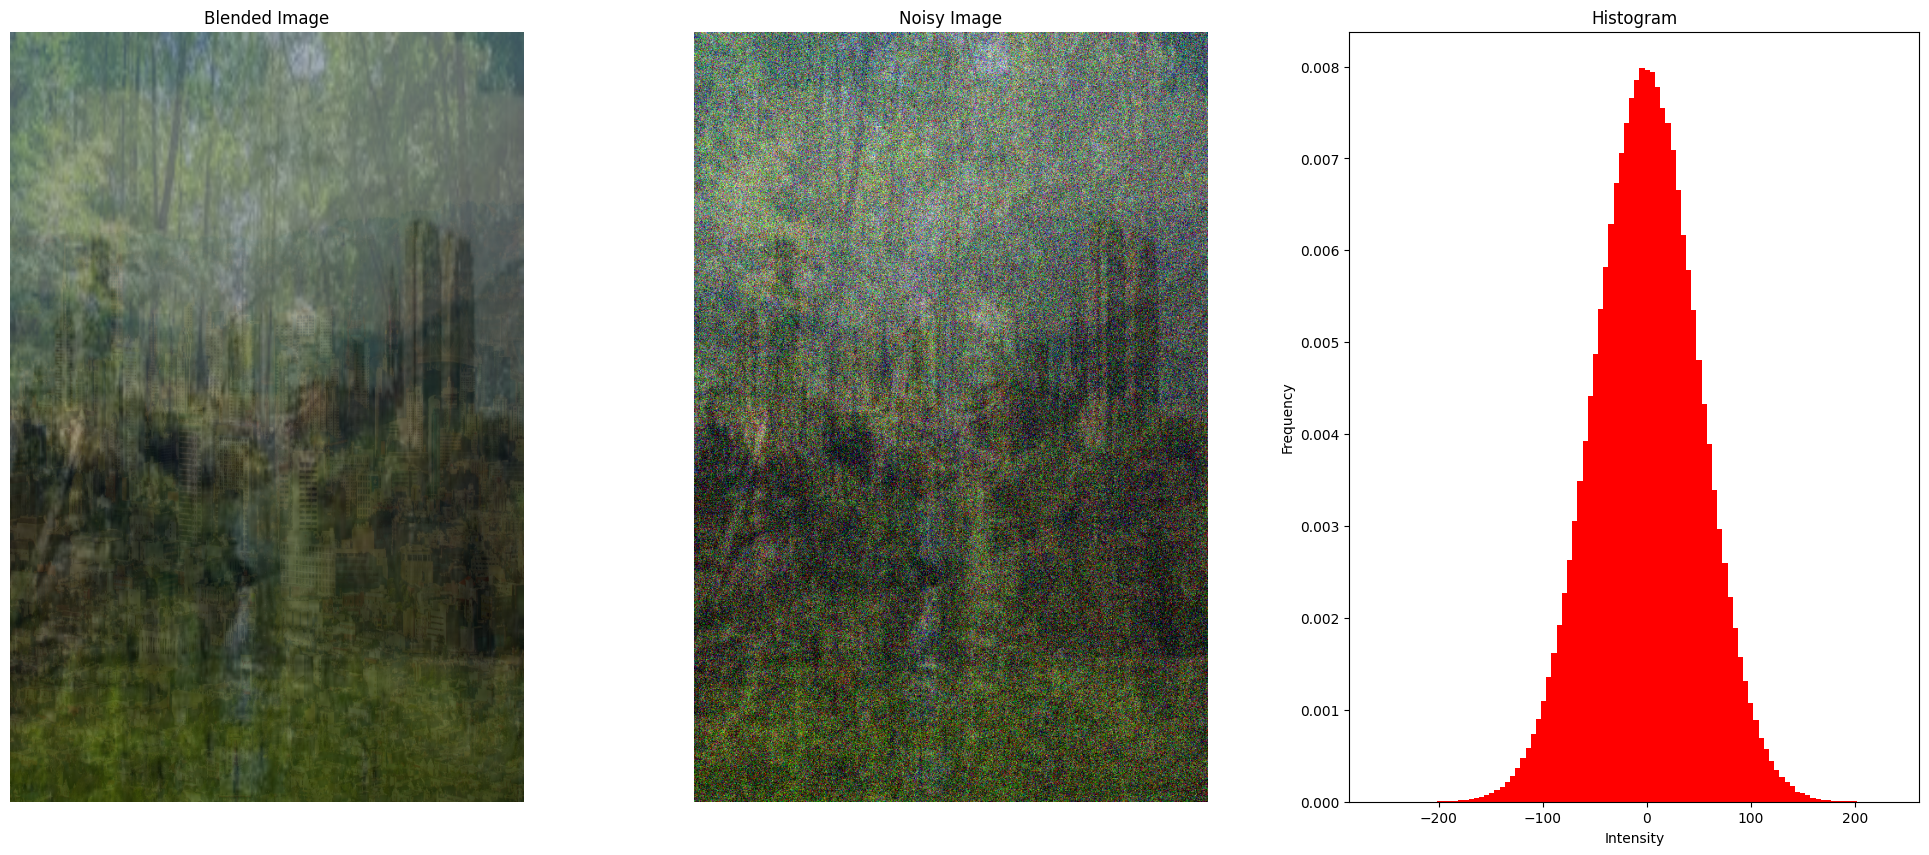

In [56]:
# Function to add Gaussian noise
def gaussian_noise(img, mean=0, std_dev=50):
    noise = np.random.normal(mean, std_dev, img.shape)
    img_noise = img + noise
    img_noise = np.clip(img_noise, 0, 255).astype('uint8')
    return img_noise, noise

# Apply Gaussian noise
noisy_img, noise = gaussian_noise(blended_img)
cv2.imwrite(os.path.join(dest_dir, 'blended_image.jpg'), blended_img)
cv2.imwrite(os.path.join(dest_dir, 'noisy_image.jpg'), noisy_img)
# Plot images and histogram
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

axes[0].set_title('Blended Image')
axes[0].imshow(cv2.cvtColor(blended_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')

axes[1].set_title('Noisy Image')
axes[1].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
axes[1].axis('off')

axes[2].set_title('Histogram')
axes[2].hist(noise.ravel(), bins=100, density=True, color='r')
axes[2].set_xlabel('Intensity')
axes[2].set_ylabel('Frequency')

plt.show()